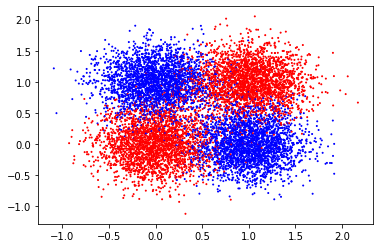

In [16]:
# import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
import mlrose
from sklearn.model_selection import train_test_split
 
#Funcion de Carga y Ordenamiento de la base
def function(ubicacion):
    datos = pd.read_csv(ubicacion)
    newtable = (datos.pivot(index='sample_number', columns='variable', values='value')
         .reset_index())[['x_1','x_2','y']].sort_values('x_1')
    return newtable;

datos_2=function(r'C:/Users/Wilde/Documents/Prueba Addi/xor_samples.csv')

 #Grafica
col= np.where(datos_2['y']==1,'b','r') 
plt.scatter(datos_2['x_1'], datos_2['x_2'], c=col, s=1, linewidth=1)
plt.show()

#Ningún clasificador podría llegar a ser perfecto puesto que existen valores que toma la variable independiente Y 
#que se ubican en regiones contraintuitivas del modelo. Incluo la creación de 4 2 cluster con sus respectivos centroides no 
#podría clasificar correctamente estos valores. En la grafica notese los puntos de color rojo o azul en regiones claramente
#color opuesto. 

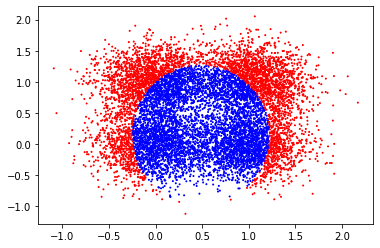

In [5]:
def naive_bayes(dataset):
    model = GaussianNB()
# Modeling Fitting 
    model.fit(dataset[['x_1','x_2']].to_numpy(), dataset[['y']].to_numpy().ravel())
# make predictions
    expected = dataset[['y']].to_numpy().ravel()
    predicted = model.predict(dataset[['x_1','x_2']].to_numpy())
# summarize the fit of the model
    dicc = metrics.classification_report(expected, predicted)
    return dicc,predicted;

dicc, predicted = naive_bayes(datos_2)

#PLOTTING PREDICTED RESULTS
col= np.where(predicted==1,'b','r')
plt.scatter(datos_2['x_1'], datos_2['x_2'], c=col, s=1, linewidth=1)
plt.show()

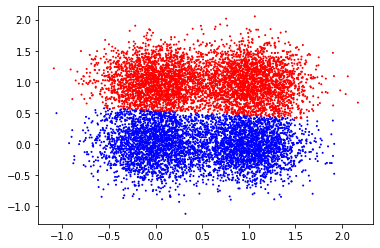

In [10]:
def logistic(dataset):
    logreg = LogisticRegression(C=1e5,solver='lbfgs')
# Modeling Fitting 
    logreg.fit(dataset[['x_1','x_2']].to_numpy(), dataset[['y']].to_numpy().ravel())
# make predictions
    expected = dataset[['y']].to_numpy().ravel()
    predicted = logreg.predict(dataset[['x_1','x_2']].to_numpy()) 
# summarize the fit of the model
    dicc = metrics.classification_report(expected, predicted,output_dict=True)
    return dicc,predicted;

dicc, predicted = logistic(datos_2)

#Plot Predicted results
col= np.where(predicted==1,'b','r') 
plt.scatter(datos_2['x_1'], datos_2['x_2'], c=col, s=1, linewidth=1)
plt.show()
#Los resultados obtenidos para este modelo coinciden con las limitaciones propias de los soluciones lineas para problemas
#de R2. No se puede trazar ninguna linea que divida los resultados entre ambas clasificaciones. Por este motivo la precision
#es igual al 50%. Sugiero la inclusion de una variable nueva, o llevar este ejercicio a un hiperplano. 

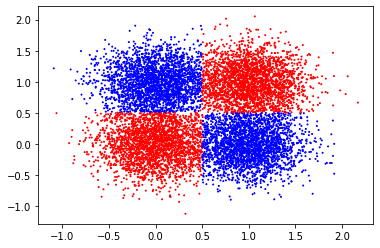

[  8.59396115   8.49292518 -16.96698805]


In [21]:
def logistic(dataset):
    logreg = LogisticRegression(C=1e5,solver='lbfgs')
# Modeling Fitting 
    logreg.fit(dataset[['x_1','x_2','x_3']].to_numpy(), dataset[['y']].to_numpy().ravel())
# make predictions
    expected = dataset[['y']].to_numpy().ravel()
    predicted = logreg.predict(dataset[['x_1','x_2','x_3']].to_numpy()) 
# summarize the fit of the model
    dicc = metrics.classification_report(expected, predicted,output_dict=True)
    coef=logreg.coef_[0]
    return dicc,predicted,coef;

datos_2['x_3']=datos_2['x_1']*datos_2['x_2']

DICC, PREDICTED, COEFFICIENTS = logistic(datos_2)

#Plot Predicted results
col= np.where(PREDICTED==1,'b','r') 
plt.scatter(datos_2['x_1'], datos_2['x_2'], c=col, s=1, linewidth=1)
plt.show()

# SHOWING COEFFINCIENTS
print(COEFFICIENTS)
#Para este ejercicio en particular, se decidió incluir la variable x_3=x_1*x_2 que en si misma es una transformación no lineal
# de las variables para enfrentar el problema. Utilizando este argumento, se puede resolver el problema con mejores resultados 
# utilizando la misma regresion lineal. Como resultados, el coeficiente de la variable x_3 pesa el doble al resto de las
#variables, como importancia es practicamente la misma. El desempeño total del modelo alcanca una precisión del 90%. 

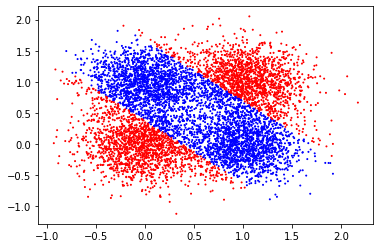

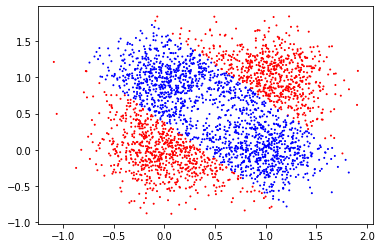

In [17]:
def neural_net(dataset):
# Split data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(dataset[['x_1','x_2']].to_numpy(), dataset[['y']].to_numpy().ravel(),
                                                    test_size = 0.3, random_state = 3)
# Normalize feature data
    nn_model1 = mlrose.NeuralNetwork(hidden_nodes = [2], activation = 'relu',
                                 algorithm = 'gradient_descent', max_iters = 1000,
                                 bias = True, is_classifier = True, learning_rate = 0.0001,
                                 early_stopping = True, clip_max = 5, max_attempts = 100,
				 random_state = 3)    
# Modeling Fitting 

    nn_model1.fit(X_train, y_train)
    predicted_tr = nn_model1.predict(X_train)
    dic_tr=metrics.classification_report(y_train, predicted_tr,output_dict=True)
# summarize the fit of the model 
    predicted_te = nn_model1.predict(X_test)
    dic_te=metrics.classification_report(y_test, predicted_te,output_dict=True)
    return dic_tr,dic_te,predicted_tr,predicted_te,X_train,X_test;
   
#MODEL EXECUTION
DIC1, DIC2 , PREDICTED_TR, PREDICTED_TE, XTRAIN, XTEST = neural_net(datos_2)
    
#TRAINNING DATASET PLOT
col= np.where(np.reshape(PREDICTED_TR,len(PREDICTED_TR) )==1,'b','r')
plt.scatter(XTRAIN[:,0],XTRAIN[:,1], c=col, s=1, linewidth=1)
plt.show()

#TEST DATASET PLOT
col= np.where(np.reshape(PREDICTED_TE,len(PREDICTED_TE) )==1,'b','r')
plt.scatter(XTEST[:,0],XTEST[:,1], c=col, s=1, linewidth=1)
plt.show()

#Dadas las caracteristicas del problema XOR, donde la expresión de cada variable depende de la otra, el uso de una red neuronal 
# con dos perceptrones permite que cada uno utilice la información de la otra para decidir si se activa o no. Esto conlleva al
# uso de una funcion de activación, que en este caso fue "relu". El algoritmo "gradient descent", que calcula rapidamente el 
#minimo de la función de perdida con un learning rate de 0.001. La precisión para el logit del punto 5 es del 50%, producto de una
# regresión lineal hecha en el plano R. Para el logit del segundo caso, además de incluir las variables iniciales, se incluye la
# variable x_3 que es una transformación no lineal. Esta produce un resultado mejor, hasta el 90%. Sin realizar ninguna transformación
# el ejercicio realizado con una red neuronal alcanza una precisión del 84% tanto en entrenamiento como en validación. 
# Se propone un ejecicio para el futuro que incluya la variable x_3 dentro de la información para un modelo de red neuronal. 
#El modelo de red neuronal en general se comporta de buena forma, sin embargo falla en predecir la región media de x_1 y x_2,
# donde ambas varaible toman valores cercanos a 0.5. En esta zona, el ruido de la función Noisy XOR tiene mayor importancia, 
# y dificulta la predicción correcta de estos casos.
#Se concluye, que a pesar que los resultados de precisón fueron mayores en la regresión logistica que incluye la variable 
# x_3, la red neuronal resulta ser una mejor selección. Las transformaciones no lineales entre dos variable son sensible al ruido
# y a los datos atipicos, además que conllevan a un aumento de la colinearidad entre las variables. Solo un &% menos de precisón
# se obtuvo de la red neuronal sin presentar estos posibles problemas. Con respecto al clasificador de Bayes, este presenta
# las mismas dificultades que la regresión logistica sin x_3, basa su procedimiento en la presunción que las variables se 
# mantienen una distribución gaussiana, y en sí mismo busca una solución del problema como clasificador lineal (no oberva
# la relación entre las dos variables independientes). 